# sklearn example

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from sklearn.datasets import make_blobs

In [14]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [27]:
data_train = np.array(data[0])
label = data[1]

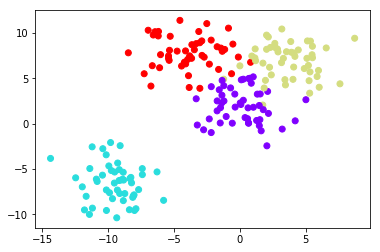

In [30]:
plt.scatter(data_train[:,0],data_train[:,1],c=label,cmap='rainbow')

## Creating the Clusters

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=4)

In [33]:
kmeans.fit(data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [36]:
kmeans.labels_

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 3, 1, 0, 2, 0, 1, 1,
       0, 2, 0, 0, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 3,
       2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 1, 1, 2, 3, 0, 3, 0, 2, 3, 1, 0, 3, 3,
       0, 3, 1, 0, 1, 0, 3, 3, 1, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       0, 1, 1, 0, 3, 2, 0, 3, 1, 0, 1, 1, 3, 1, 0, 3, 0, 0, 3, 2, 2, 3, 0,
       3, 2, 2, 3, 2, 1, 2, 1, 2, 1, 3, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 3, 2,
       3, 1, 0, 3, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2, 1, 3, 1, 2, 3, 3, 3, 1, 3,
       1, 1, 2, 0, 2, 1, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 3, 0, 3, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 3, 3, 2, 0, 1, 3, 3, 0, 1], dtype=int32)

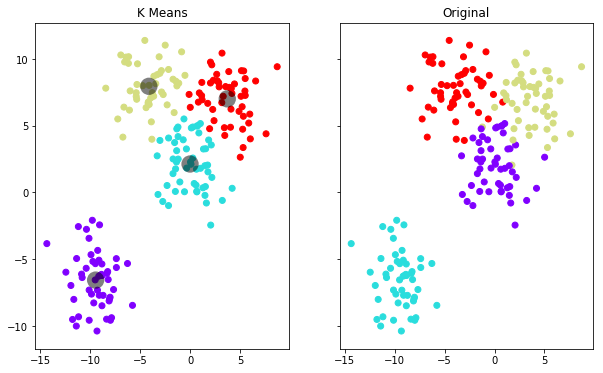

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data_train[:,0],data_train[:,1],c=kmeans.labels_,cmap='rainbow')
ax1.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='k',marker='o',s=300,alpha=0.5,edgecolor='none');

ax2.set_title("Original")
ax2.scatter(data_train[:,0],data_train[:,1],c=label,cmap='rainbow')

## Find good K

In [59]:
print kmeans.inertia_

C = kmeans.labels_
center = kmeans.cluster_centers_
score = 0
for i in xrange(len(C)):
    score += np.sum((data_train[i] - center[C[i]])**2)
print score

1318.40357255
1318.40357255


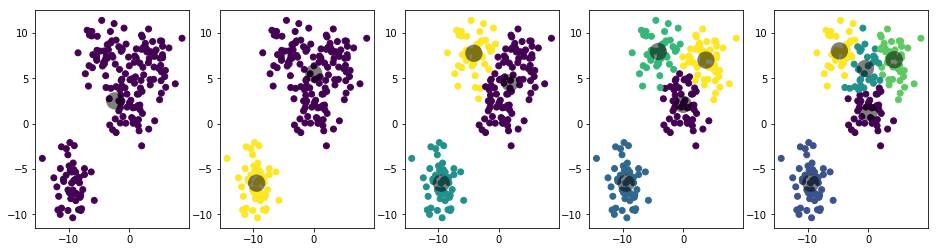

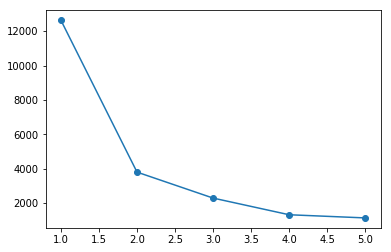

In [70]:
score = []
fig, ax = plt.subplots(nrows = 1, ncols=5, figsize = (16,4))
for i in range(1,6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_train)
    score.append(kmeans.inertia_)
    ax[i-1].scatter(data_train[:,0],data_train[:,1],c = kmeans.labels_)
    ax[i-1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
                c='k',marker='o',s=300,alpha=0.5,edgecolor='none')

fit = plt.figure()
plt.plot(range(1,6), score, "o-");